In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) 
%matplotlib inline 
import scipy.stats as stats

In [2]:
df = pd.read_csv('Survey-1.csv')

In [3]:
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [5]:
df.shape

(62, 14)

In [6]:
df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [64]:
print('Gender: ',df.Gender.unique())
print('\nClass: ',df.Class.unique())
print('\n Major: ', df.Major.unique())
print('\nGrad Intention: ',df['Grad Intention'].unique())
print('\nEmployment: ',df.Employment.unique())
print('\nComputer: ',df.Computer.unique())

Gender:  ['Female' 'Male']

Class:  ['Junior' 'Senior' 'Sophomore']

 Major:  ['Other' 'Management' 'CIS' 'Economics/Finance' 'Undecided'
 'International Business' 'Retailing/Marketing' 'Accounting']

Grad Intention:  ['Yes' 'Undecided' 'No']

Employment:  ['Full-Time' 'Part-Time' 'Unemployed']

Computer:  ['Laptop' 'Tablet' 'Desktop']


### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

#### 2.1.1. Gender and Major

In [7]:
df_gen_maj = pd.crosstab(df.Gender, df.Major,margins='True')

In [8]:
df_gen_maj

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


#### 2.1.2. Gender and Grad Intention



In [9]:
df_gen_gradint = pd.crosstab(df.Gender, df['Grad Intention'],margins = True)
df_gen_gradint

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


#### 2.1.3. Gender and Employment

In [10]:
df_gen_emp = pd.crosstab(df.Gender, df['Employment'], margins = 'True')
df_gen_emp

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


#### 2.1.4. Gender and Computer

In [11]:
df_gen_comp = pd.crosstab(df.Gender, df.Computer, margins = 'True')
df_gen_comp

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [12]:
df.Gender.value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [68]:
print('Probability that a randomly selected student is a male is = ', 29/62)

Probability that a randomly selected student is a male is =  0.46774193548387094


#### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [69]:
print('Probability that a randomly selected student is a female is = ', 33/62)

Probability that a randomly selected student is a female is =  0.532258064516129


### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [15]:
df_gen_maj

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [16]:
tot_males = 29

In [17]:
majors = df.Major.unique().tolist()
majors = sorted(majors)
majors

['Accounting',
 'CIS',
 'Economics/Finance',
 'International Business',
 'Management',
 'Other',
 'Retailing/Marketing',
 'Undecided']

In [18]:
for i in majors:
    print('Conditional Probability for major',i,'is: ' ,df_gen_maj.loc['Male'][i]/29,'\n')

Conditional Probability for major Accounting is:  0.13793103448275862 

Conditional Probability for major CIS is:  0.034482758620689655 

Conditional Probability for major Economics/Finance is:  0.13793103448275862 

Conditional Probability for major International Business is:  0.06896551724137931 

Conditional Probability for major Management is:  0.20689655172413793 

Conditional Probability for major Other is:  0.13793103448275862 

Conditional Probability for major Retailing/Marketing is:  0.1724137931034483 

Conditional Probability for major Undecided is:  0.10344827586206896 



#### 2.3.2 Find the conditional probability of different majors among the female students of CMSU

In [19]:
df_gen_maj

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [20]:
for i in majors:
    print('Conditional Probability of a female opting  major',i,'is: ', df_gen_maj.loc['Female'][i]/33,'\n')

Conditional Probability of a female opting  major Accounting is:  0.09090909090909091 

Conditional Probability of a female opting  major CIS is:  0.09090909090909091 

Conditional Probability of a female opting  major Economics/Finance is:  0.21212121212121213 

Conditional Probability of a female opting  major International Business is:  0.12121212121212122 

Conditional Probability of a female opting  major Management is:  0.12121212121212122 

Conditional Probability of a female opting  major Other is:  0.09090909090909091 

Conditional Probability of a female opting  major Retailing/Marketing is:  0.2727272727272727 

Conditional Probability of a female opting  major Undecided is:  0.0 



### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [21]:
df_gen_gradint

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [22]:
print('Prob that a randomly selected student is a male and intends to graduate: ',17/62)

Prob that a randomly selected student is a male and intends to graduate:  0.27419354838709675


#### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [23]:
df_gen_comp

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [24]:
fem_no_lap = df_gen_comp.loc['Female']['All'] - df_gen_comp.loc['Female']['Laptop']
fem_no_lap

4

In [71]:
print('Probability that a student selected at random is a female and does not have a laptop is: ', 
      fem_no_lap/62)

Probability that a student selected at random is a female and does not have a laptop is:  0.06451612903225806


### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [26]:
df_gen_emp

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


Either a male or has full time employment: -
A : Prob of a male student
B : Prob of Full time employment
P(A or B) = P(A) + P(B) - P(A and B)

In [27]:
A = 29/62
B = 10/62
AB = 7/62
print('Probability that a randomly chosen student is either a male or has full-time employment:', A+B-AB)

Probability that a randomly chosen student is either a male or has full-time employment: 0.5161290322580645


#### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [28]:
df_gen_maj

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


We need to compute the following
- P( (international business or managementFemale |)
- International business and Management are mutually exclusive
- therefore required Probability: -
- P(INternational Business|F) + P(Management|F)


In [29]:
# P(International business|F)
p_f_int_bus = 4/33

In [30]:
# P(Management|F)
p_f_mngmnt = 4/33

In [31]:
print('Conditional probability for the given condition is: ',p_f_int_bus + p_f_mngmnt)

Conditional probability for the given condition is:  0.24242424242424243


### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [32]:
df_gen_gradint

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [33]:
df1 = df[df['Grad Intention']!="Undecided"]

In [34]:
df_grad_int = pd.crosstab(df1.Gender, df1['Grad Intention'], margins = True)
df_grad_int

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


- Checking for Independent events
- P(F and Yes) = P(F).P(Yes)


In [35]:
prob_f_yes = 11/40
prob_f = 9/40
prob_yes = 28/40

In [36]:
if prob_f_yes == prob_f * prob_yes:
    print('Independent')
else:
    print('Not Independent')

Not Independent


### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

#### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [37]:
tot_stud = df.GPA.count()

In [38]:
less_than_3 = len(df[df['GPA']<3])

In [39]:
print('Probability that a random student has GPA less than 3 is: ', less_than_3/tot_stud)

Probability that a random student has GPA less than 3 is:  0.27419354838709675


#### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [72]:
total_males = len(df[df.Gender=="Male"])
total_males

29

We need to find the following: -
- P(earns 50 or more | Male)
- To put it in words we need to find the conditional probability that a person earns 50 or more given that he is a male
- It can also be calculated as n(>=50 and Male) / n(male)

In [42]:
# Male and earning more than 50
len(df[(df.Gender=="Male")&(df.Salary>=50)])

14

In [73]:
print('The proability that a randomly selcted male earning 50 or more is: ',14/29)

The proability that a randomly selcted male earning 50 or more is:  0.4827586206896552


In [44]:
# Female and earning more than 50
len(df[(df.Gender=="Female")&(df.Salary>=50)])

18

In [45]:
total_females = len(df[df.Gender=="Female"])
total_females

33

In [74]:
print('Probability that a randomly selected female earns 50 or more is : ',18/33)

Probability that a randomly selected female earns 50 or more is :  0.5454545454545454


In [47]:
df_gen_comp['No laptop'] = df_gen_comp['All']-df_gen_comp['Laptop']

### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [48]:
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [49]:
df_cont = df.loc[:][['GPA','Salary','Spending','Text Messages']]

In [50]:
df_cont.head()

,GPA,Salary,Spending,Text Messages
0,2.9,50.0,350,200
1,3.6,25.0,360,50
2,2.5,45.0,600,200
3,2.5,40.0,600,250
4,2.8,40.0,500,100


In [51]:
df_cont = df_cont.describe().T

In [52]:
df_cont.loc[:,'IQR'] = df_cont['75%'] - df_cont['25%']

In [53]:
df_cont.loc[:,'COV'] = df_cont['std']/df_cont['mean']

In [54]:
skewness = [stats.skew(df.GPA), stats.skew(df.Salary), stats.skew(df.Spending), 
            stats.skew(df['Text Messages'])]

In [55]:
df_cont.loc[:,'Skewness'] = skewness
df_cont

,count,mean,std,min,25%,50%,75%,max,IQR,COV,Skewness
GPA,62.0,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9,0.5,0.120609,-0.306937
Salary,62.0,48.548387,12.080912,25.0,40.0,50.00,55.0,80.0,15.0,0.248843,0.521677
Spending,62.0,482.016129,221.953805,100.0,312.5,500.00,600.0,1400.0,287.5,0.460470,1.547285
Text Messages,62.0,246.209677,214.465950,0.0,100.0,200.00,300.0,900.0,200.0,0.871070,1.264245


Key Insights: -
- COV is min for GPA hence its the most consistent disttribution
- On the other hand Text Messages are the one with max COV.
- GPA is a bit left skewed
- Salary is Normally distributed
- Text messages and Spending are Right skewed

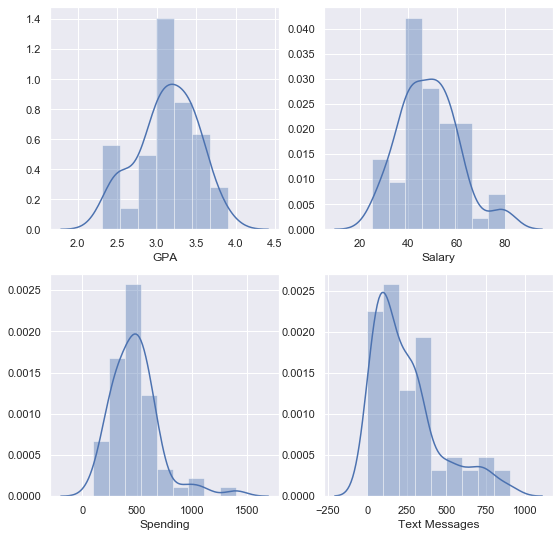

In [76]:
plt.figure(figsize = (9,9))
plt.subplot(2,2,1)
sns.distplot(df.GPA, kde = True)
plt.subplot(2,2,2)
sns.distplot(df.Salary)
plt.subplot(2,2,3)
sns.distplot(df.Spending)
plt.subplot(2,2,4)
sns.distplot(df['Text Messages'])
plt.show()

#### Checking the empirical Rule

Emperical rule can only be checked for GPA and Salary as these only seem to be normally distributed

In [77]:
gpa_lower_lim = df_cont.loc['GPA']['mean'] - df_cont.loc['GPA']['std']
gpa_upper_lim = df_cont.loc['GPA']['mean'] + df_cont.loc['GPA']['std']

In [59]:
# According to emperical rule 68% of data shoul lie within
# mean+-sigma limits
# can be done using stats.norm.cdf
print('Emperical test for GPA')
print(stats.norm.cdf(gpa_upper_lim,3.129032,0.377388) - 
      stats.norm.cdf(gpa_lower_lim,3.129032,0.377388))

Emperical test for GPA
0.6826899957094594


The above value testifies that GPA passes the emperical test


#### Emperical test for Salary: -

In [60]:
sal_upper_lim = df_cont.loc['Salary']['mean'] + df_cont.loc['Salary']['std']
sal_lower_lim = df_cont.loc['Salary']['mean'] - df_cont.loc['Salary']['std']

In [61]:
print('Emperical test for Salary: - ')
stats.norm.cdf(sal_upper_lim,48.548387,12.080912)-
stats.norm.cdf(sal_lower_lim,48.548387,12.080912)

Emperical test for Salary: - 


0.682689500803201